# TD de régression - Partie 3 - Données réelles

**Objectif de ce Notebook :**

Entrainer des modèles de régression avec des **données réelles**

**Mots-clés :**

- **Régression linéaire**
- **Erreur quadratique moyenne (MSE)**
- **Erreur absolue moyenne (MAE)**

**Ressources :**

- [Erreur absolue moyenne (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

▶️ Importer les bibliothèques nécessaires à l'activité

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Prédiction des données du décathlon

Les données du décathlon sont contenues dans le fichier `data_score.csv`

## 💻 Code à compléter

**Objectif :**

**Récupérer et analyser les données** du décathlon 

**Etapes :**

- Récupérer dans un dataframe Pandas les données du fichier CSV nommé `data_score.csv` et utiliser le paramètre `index_col` pour fixer le nom des coureurs comme index
- Afficher une description statistique des données à l'aide de la méthode de dataframe `describe()`
- Vérifier que la colonne `Total` correspond à la somme des 10 autres colonnes

**Ressources à utiliser :**

Lien vers la documentation :

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [2]:
df = pd.read_csv("data_score.csv", index_col=0)
print(df.describe())

              100m     Longueur       Poids     Hauteur         400m  \
count    59.000000    59.000000   59.000000   59.000000    59.000000   
mean    867.661017   889.830508  743.322034  814.474576   867.474576   
std      71.208439    68.628976   62.700558   64.517401    59.382848   
min     746.000000   727.000000  568.000000  661.000000   750.000000   
25%     818.500000   850.500000  714.500000  767.000000   831.500000   
50%     856.000000   886.000000  755.000000  822.000000   875.000000   
75%     913.500000   935.000000  796.500000  859.000000   903.500000   
max    1040.000000  1030.000000  851.000000  963.000000  1060.000000   

        110m haies      Disque       Perche      Javelot       1500m  \
count    59.000000   59.000000    59.000000    59.000000   59.000000   
mean    910.525424  747.050847   845.728814   739.813559  702.067797   
std      60.617613   76.144016   178.055574    91.408419   72.078469   
min     798.000000  533.000000     0.000000   568.000000  381.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Adam Helcelet - 2015 to Keisuke Ushiro - 2019
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   100m        59 non-null     int64
 1   Longueur    59 non-null     int64
 2   Poids       59 non-null     int64
 3   Hauteur     59 non-null     int64
 4   400m        59 non-null     int64
 5   110m haies  59 non-null     int64
 6   Disque      59 non-null     int64
 7   Perche      59 non-null     int64
 8   Javelot     59 non-null     int64
 9   1500m       59 non-null     int64
 10  Total       59 non-null     int64
dtypes: int64(11)
memory usage: 5.5+ KB


In [4]:
# Vérification de la valeur de la dernière colonne
(df.iloc[:, :-1].sum(axis=1)-df.iloc[:,-1]).sum()

0

## 💻 Code à compléter

**Objectif :**

**Analyser les corrélations** entre les colonnes

**Etapes :**

- Créer la **matrice de corrélation** du jeu de données à l'aide de la méthode de dataframe `corr()`
- Afficher les graphiques de corrélation entre chacune des colonnes 2 à 2 grâce à la fonction `pairplot()` de Seaborn
- Supprimer la dernière colonne nommée `Total`

**Ressources à utiliser :**

Lien vers la documentation :

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des corrélations')
plt.show()

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
data = df.iloc[:, :-1].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Adam Helcelet - 2015 to Keisuke Ushiro - 2019
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   100m        59 non-null     int64
 1   Longueur    59 non-null     int64
 2   Poids       59 non-null     int64
 3   Hauteur     59 non-null     int64
 4   400m        59 non-null     int64
 5   110m haies  59 non-null     int64
 6   Disque      59 non-null     int64
 7   Perche      59 non-null     int64
 8   Javelot     59 non-null     int64
 9   1500m       59 non-null     int64
dtypes: int64(10)
memory usage: 7.1+ KB


## 💻 Code à compléter

**Objectif :**

**Entrainer 9 régressions linéaires** pour prédire chaque caractéristique en fonction des 8 autres

**Etapes :**

- **Entrainer 9 régressions linéaires** pour prédire chaque caractéristique en fonction des 8 autres et afficher le RMSE sur le jeu de test
- Afficher l'**histogramme des RMSE** classées par ordre croissant
- **Analyser le résultat**. Quelles sont les caractéristiques les plus compliquées à prédire ?

**Ressources à utiliser :**

Lien vers la documentation :

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

In [8]:
def train_and_evaluate(df):
    results = {}
    for column in df.columns:
        X = df.drop(columns=[column])
        y = df[column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, y_pred)
        results[column] = {
            'model': model,
            'rmse': rmse,
            'y_test': y_test,
            'y_pred': y_pred
        }
        print(f"Modèle pour prédire {column}:\n RMSE: {rmse}\n")
    return results
results = train_and_evaluate(data)

Modèle pour prédire 100m:
 RMSE: 32.274240167325914

Modèle pour prédire Longueur:
 RMSE: 40.60929852786987

Modèle pour prédire Poids:
 RMSE: 52.09911120029726

Modèle pour prédire Hauteur:
 RMSE: 43.16652857235329

Modèle pour prédire 400m:
 RMSE: 36.69056490986764

Modèle pour prédire 110m haies:
 RMSE: 30.99082782968371

Modèle pour prédire Disque:
 RMSE: 59.65581630991256

Modèle pour prédire Perche:
 RMSE: 83.63031222401338

Modèle pour prédire Javelot:
 RMSE: 108.071888980819

Modèle pour prédire 1500m:
 RMSE: 56.97623141665833



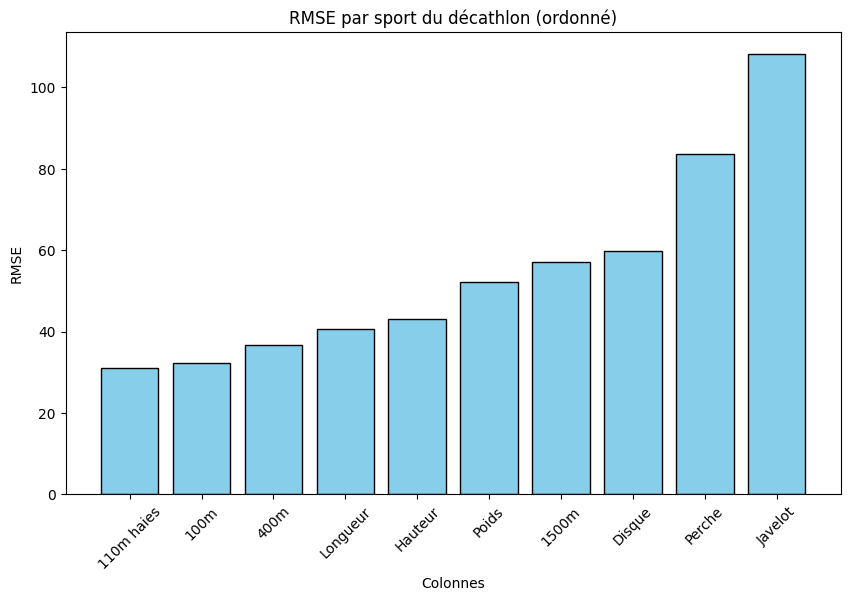

In [9]:
columns = list(results.keys())
rmse_values = [results[column]['rmse'] for column in columns]
rmse_df = pd.DataFrame({'column': columns, 'rmse': rmse_values})
rmse_df = rmse_df.sort_values(by='rmse')
sorted_columns = rmse_df['column'].tolist()
sorted_rmse_values = rmse_df['rmse'].tolist()
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_rmse_values, color='skyblue', edgecolor='black')
plt.title('RMSE par sport du décathlon (ordonné)')
plt.xlabel('Colonnes')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

## 💻 Code à compléter

Choisir une **épreuve** et entrainer des modèles de régression pour chacune des **autres colonnes**

In [16]:
def train_and_evaluate(df, col):
    results = {}
    for column in df.columns:
        if col!=column:
            X = df[col]
            y = df[column]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
            model = LinearRegression()
            model.fit(X_train.to_numpy().reshape(-1, 1), y_train)
            y_pred = model.predict(X_test.to_numpy().reshape(-1, 1))
            rmse = root_mean_squared_error(y_test, y_pred)
            results[column] = {
                'model': model,
                'rmse': rmse,
                'y_test': y_test,
                'y_pred': y_pred
            }
            print(f"Modèle pour prédire le {col} avec les données de {column}:\n RMSE: {rmse}\n")
    return results
name = "100m"
print(f"Epreuve du {name}")
results = train_and_evaluate(data, name)

Epreuve du 100m
Modèle pour prédire le 100m avec les données de Longueur:
 RMSE: 47.36096406749805

Modèle pour prédire le 100m avec les données de Poids:
 RMSE: 63.50653828683367

Modèle pour prédire le 100m avec les données de Hauteur:
 RMSE: 58.663020881708896

Modèle pour prédire le 100m avec les données de 400m:
 RMSE: 45.262450267232076

Modèle pour prédire le 100m avec les données de 110m haies:
 RMSE: 34.72687103508586

Modèle pour prédire le 100m avec les données de Disque:
 RMSE: 62.749706226381356

Modèle pour prédire le 100m avec les données de Perche:
 RMSE: 67.99141871852514

Modèle pour prédire le 100m avec les données de Javelot:
 RMSE: 118.49190745805444

Modèle pour prédire le 100m avec les données de 1500m:
 RMSE: 73.90464947462158

